## American Fast Food Restaurant's Data Analysis


### Table of Contents:

1. Input Dataset

2. Take a peek at the data

3. Let's check do we have missing data

4. Let's drop id, keys, sourceURLs, and websites first

5. Restaurants Names Exploration and Visualizations:

6. NLP: More data cleaning

7. Explore the food categories and visualize them

8. Let's explore the location data of given dataset

9. Ratio between restaurants opened and population

In [3]:
import numpy as np
import pandas as pd
import os

print(os.listdir('./fast_food'))

['Datafiniti_Fast_Food_Restaurants_May19.csv', 'US-Census-2017.txt', 'Datafiniti_Fast_Food_Restaurants.csv', 'FastFoodRestaurants.csv', 'US-2-letter-state-code.csv']


### Take a Peak at Data

In [4]:
food_data = pd.read_csv('./fast_food/Datafiniti_Fast_Food_Restaurants_May19.csv')
food_data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [5]:
food_data.dtypes

id                    object
dateAdded             object
dateUpdated           object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
name                  object
postalCode            object
province              object
sourceURLs            object
websites              object
dtype: object

In [6]:
food_data.shape

(10000, 16)

In [9]:
# drop ids, sourceURL, websites and keys

food_data = food_data.drop(['id', 'keys', 'sourceURLs', 'websites'], axis=1)

In [10]:
# dimension after droping columns

food_data.shape

(10000, 12)

### Check for missing data

In [13]:
def missing_values_describe(data):
    missing_values = (data.isnull().sum() / len(data)*100)
    missing_values_count = sum(missing_values > 0)
    missing_values = missing_values.sort_values(ascending=False)[:missing_values_count]
    
    print("Number of missing values count: ", missing_values_count)
    
    if missing_values_count != 0:
        print("Missing Values Percentage: ")
        print(missing_values)
        
    else:
        print("No Missing Data")

In [14]:
missing_values_describe(food_data)

Number of missing values count:  0
No Missing Data


### Exploring Data

In [15]:
# number of unique names

print("Number of unique restaurant names: ", food_data['name'].nunique())

Number of unique restaurant names:  1545


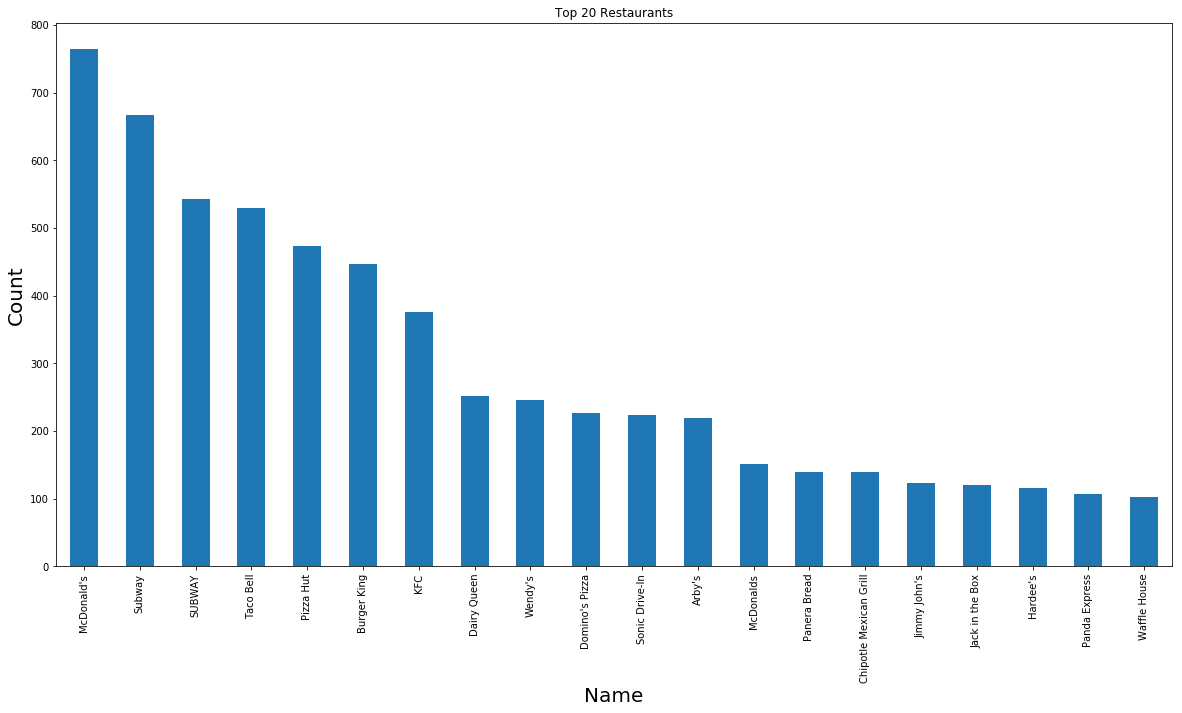

In [21]:
# top 20 recorded fast food restaurant

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
nameplot = food_data['name'].value_counts()[:20].plot.bar(title="Top 20 Restaurants")
nameplot.set_xlabel('Name',size=20)
nameplot.set_ylabel('Count',size=20);

Number of Unique Cities:  2810


Text(0,0.5,'Count')

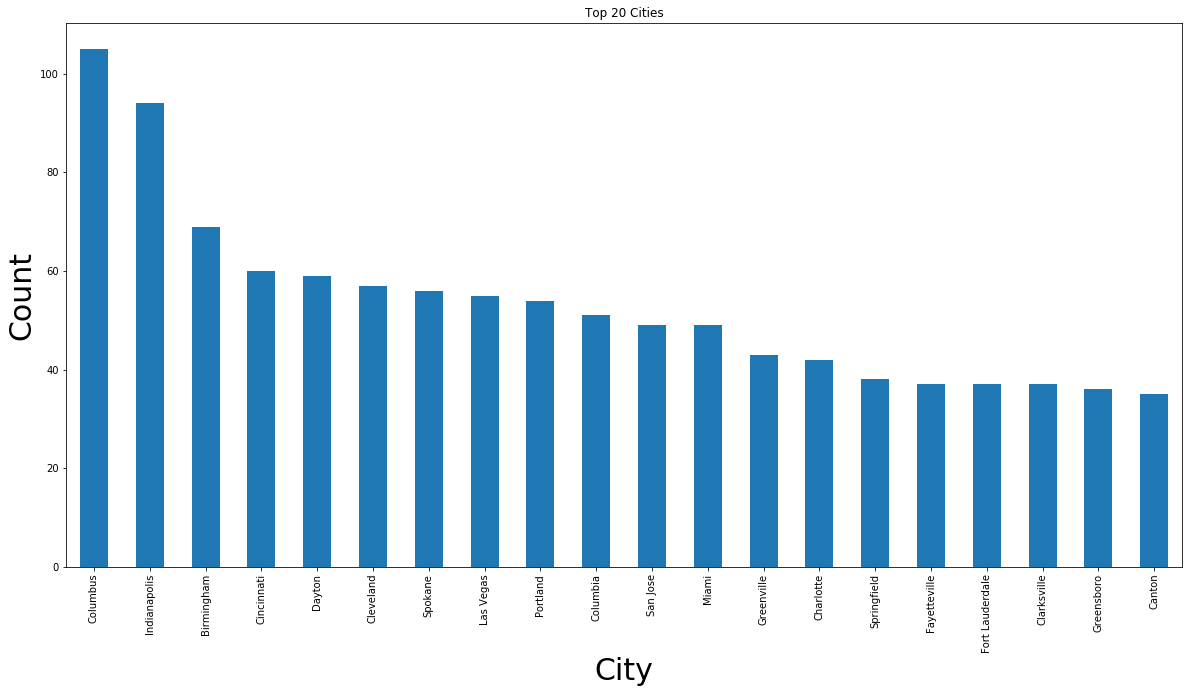

In [25]:
# top 20 cities in terms of count of fast food restaurants
plt.figure(figsize=(20,10))
print("Number of Unique Cities: ", food_data['city'].nunique())
nameplot = food_data['city'].value_counts()[:20].plot.bar(title="Top 20 Cities")
nameplot.set_xlabel('City',size=30)
nameplot.set_ylabel('Count', size=30)

In [27]:
# restaurants by city, find out mean and median

restaurant_count_city = food_data['city'].value_counts()
restaurant_count_city.describe()

count    2810.000000
mean        3.558719
std         6.260422
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       105.000000
Name: city, dtype: float64

In [28]:
# cities with less than 4 restaurants

print(len(restaurant_count_city[restaurant_count_city < 4]), "cities opened with less than 4 fast food restaurants.")

2121 cities opened with less than 4 fast food restaurants.


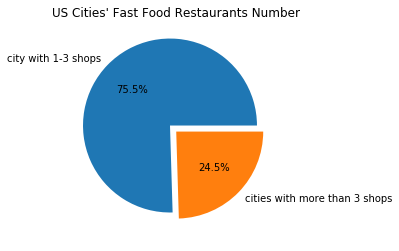

In [35]:
# plot pie chart
fig, ax = plt.subplots()
total_cities_with_less_than_4_rests = len(restaurant_count_city[restaurant_count_city < 4])
total_cities_with_greater_equal_4_rests = food_data['city'].nunique() - total_cities_with_less_than_4_rests
values = [total_cities_with_less_than_4_rests, total_cities_with_greater_equal_4_rests]
ax.pie(values, 
       labels=["city with 1-3 shops", "cities with more than 3 shops"], autopct='%.1f%%', radius=1, 
       explode = (0.1, 0))
ax.set_aspect('equal')
ax.set_title("US Cities' Fast Food Restaurants Number")
plt.show()